<a href="https://colab.research.google.com/github/RaquelRamos/20160638/blob/master/SAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
url = 'https://raw.githubusercontent.com/RaquelRamos/20160638/master/DUQ_hourly.csv'
df1 = pd.read_csv(url)

df1

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
5,2005-12-31 06:00:00,1372.0
6,2005-12-31 07:00:00,1402.0
7,2005-12-31 08:00:00,1425.0
8,2005-12-31 09:00:00,1502.0
9,2005-12-31 10:00:00,1556.0


Dimensionalidade do Dataset

In [0]:
df1.shape

(119068, 2)

Esparsidade dos dados do Dataset

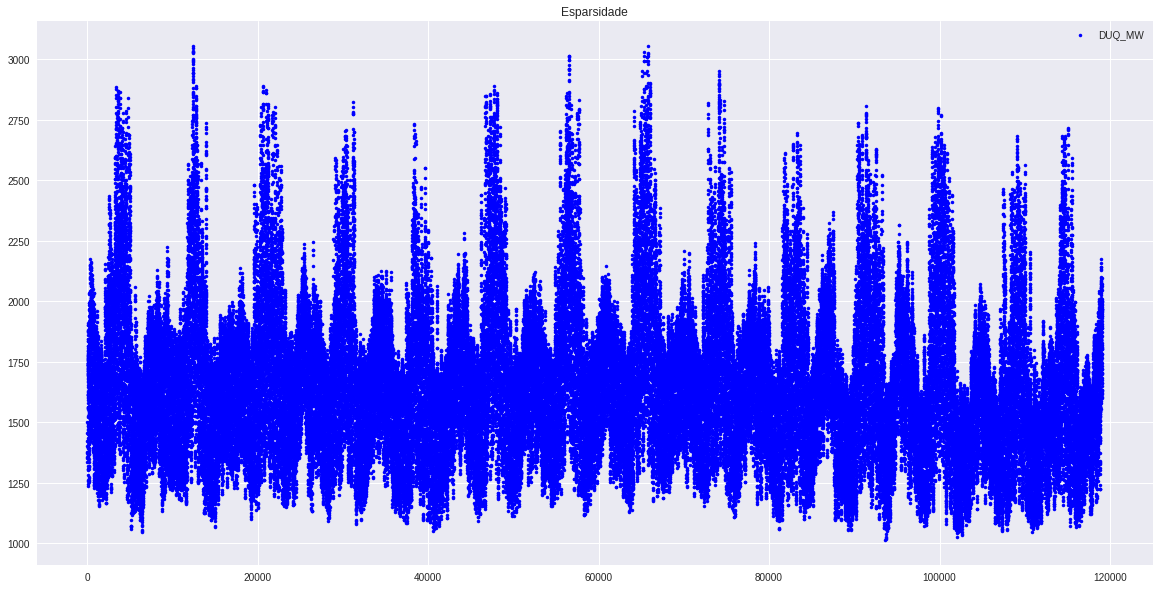

In [0]:
df1.plot(style='.', figsize=(20,10), color= 'b', title='Esparsidade')

Resolução

Tamanho do Dataset

In [0]:
df1.size

238136

In [0]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1 = df1.set_index('Datetime')

df1 = df1.groupby(pd.Grouper(freq="D")).sum()
df1

,DUQ_MW
Datetime,
2005-01-01,31111.0
2005-01-02,32958.0
2005-01-03,37991.0
2005-01-04,38658.0
2005-01-05,41064.0
2005-01-06,40175.0
2005-01-07,40941.0
2005-01-08,38050.0
2005-01-09,36173.0
